Model Fitting

We will 
- Fit various different statistical distributions to the data
- Use the KS test & Q-Q plots to evaluate quality-of-fit
- calculate the best fit parameters to the most favorable distirbution

# For Customer Arrivals #
- We use poisson distributions because interarrival times are exponential and memoryless
- This makes sense because the arrival of one customer doesn't impact the arrival of a successive customer. Each customer is treated as iid. 

In [54]:
# Function to calculate Poisson distribution, perform KS test, and plot Q-Q plot
def poisson_analysis(data, title):
    # Estimate lambda (Poisson parameter) from the sample mean
    lambda_est = np.mean(data)
    print(f"{title}")
    print(f"Estimated Poisson lambda: {lambda_est:.3f}")
    
    # Fit Poisson distribution to the data
    poisson_dist = stats.poisson(mu=lambda_est)
    
    # KS test: compare the raw data with fitted Poisson distribution
    ks_stat, ks_p_value = stats.kstest(data, poisson_dist.cdf)
    print(f"KS Statistic: {ks_stat:.4f}")
    print(f"KS P-value: {ks_p_value:.4f}")

    # Determine if Poisson distirbution is a valid model
    if ks_p_value > 0.05:
        print("The data appears to follow the Poisson distribution (fail to reject null hypothesis).")
    else:
        print("The data does not appear to follow the Poisson distribution (reject null hypothesis).")
    print("\n")
    
    # Plot histogram of data and overlay fitted Poisson distribution
    plt.figure(figsize=(12, 6))
    
    # Plot histogram
    plt.hist(data, bins=10, density=True, alpha=0.6, color='g', edgecolor='black', label="Observed Data")
    
    # Plot Poisson probability mass function
    x_vals = np.arange(0, np.max(data) + 1)
    plt.plot(x_vals, poisson_dist.pmf(x_vals), 'bo', ms=8, label=f'Fitted Poisson λ={lambda_est:.2f}')

    # Design graph
    plt.title(f"{title} - Histogram and Fitted Poisson Distribution")
    plt.xlabel("Value")
    plt.ylabel("Density")
    plt.legend()
    plt.show()
    
    # Q-Q plot for Poisson distribution
    stats.probplot(data, dist="poisson", sparams=(lambda_est,), plot=plt)
    plt.title(f"{title} - Q-Q Plot for Poisson Distribution")
    plt.show()


Customers Entering (On-Peak)
Estimated Poisson lambda: 42.800
KS Statistic: 0.2121
KS P-value: 0.4485
The data appears to follow the Poisson distribution (fail to reject null hypothesis).




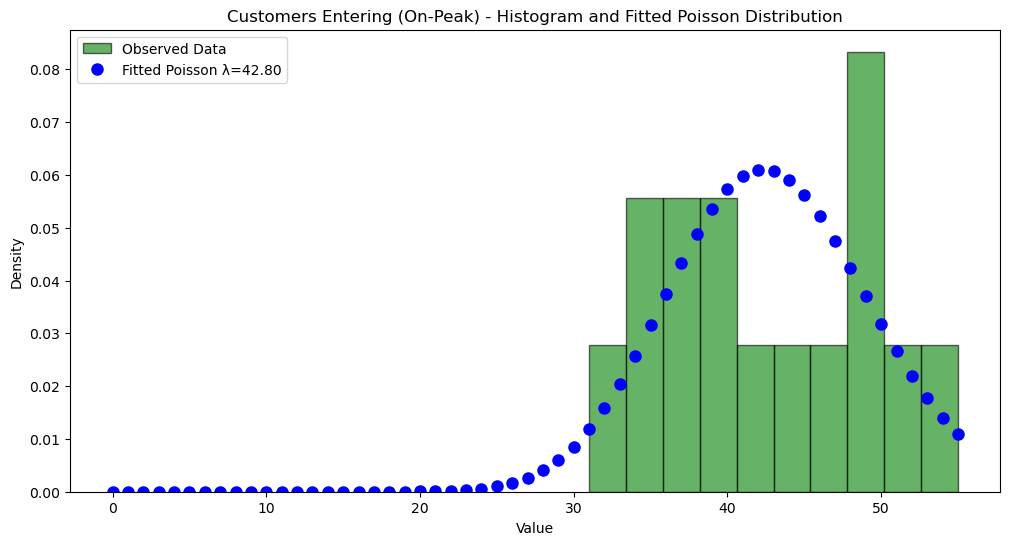

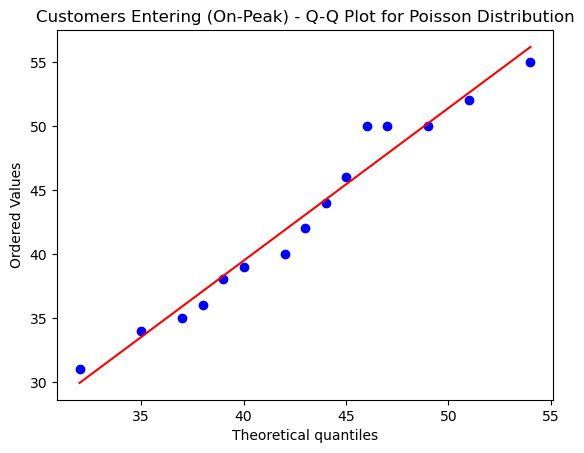

In [55]:
# Perform Poisson analysis on the on-peak data
customers_entering_on_peak = np.array([50, 39, 55, 40, 35, 46, 34, 42, 50, 31, 50, 44, 38, 36, 52])
poisson_analysis(customers_entering_on_peak, "Customers Entering (On-Peak)")

Customers Entering (Off-Peak)
Estimated Poisson lambda: 20.733
KS Statistic: 0.1220
KS P-value: 0.9588
The data appears to follow the Poisson distribution (fail to reject null hypothesis).




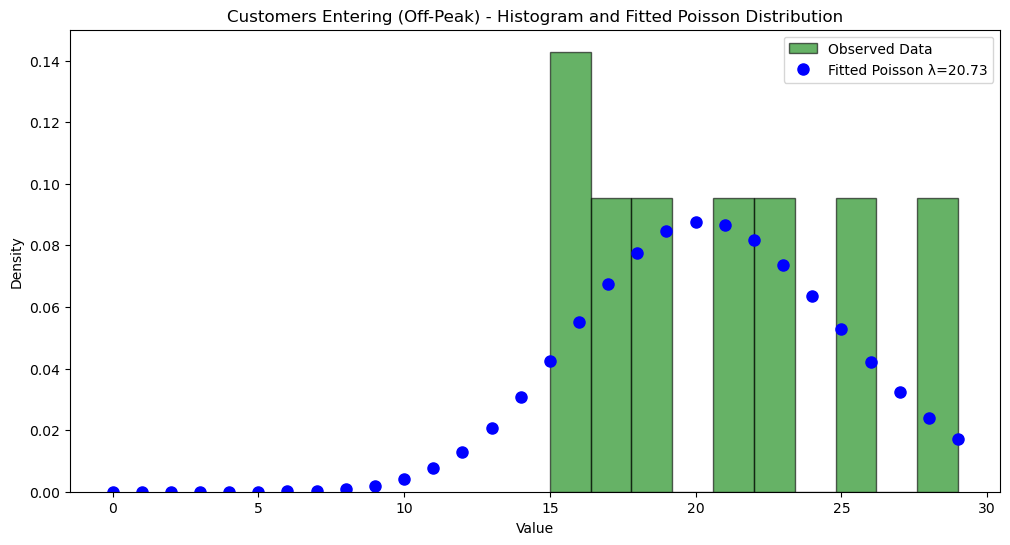

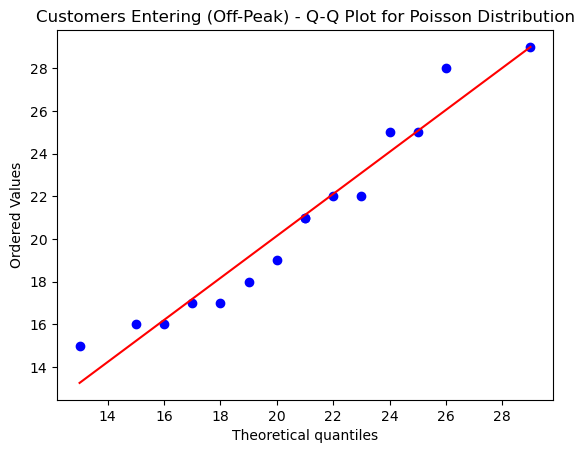

In [56]:
# Perform Poisson analysis on the off-peak data
customers_entering_off_peak = np.array([15, 29, 21, 18, 22, 28, 17, 21, 16, 22, 19, 16, 25, 17, 25])
poisson_analysis(customers_entering_off_peak, "Customers Entering (Off-Peak)")

# For Item Removals (Frozen, Snacks, Bakery) #
- We will have to attempt to fit various different distributions because we don't know which is best
- We calculate the KS statistics, p-value, and parameters for each distribution
- Favor the distribution that has the lowest KS statistic, and highest p-value (>0.05)

In [58]:
# All necessary imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats as stats

In [59]:
# Define the function to fit multiple distributions and evaluate goodness of fit
def fit_multiple_distributions(data, dist_names):
    results = []  # List to store the results of each distribution
    
    for dist_name in dist_names:
        dist = getattr(stats, dist_name)

        # Fit the distribution to data using MLE
        params = dist.fit(data)

        # Perform the KS test
        ks_stat, ks_p = stats.kstest(data, dist_name.lower(), args=params)
            
        # Store the results in the list
        rounded_params = [round(p, 3) for p in params]  # Round parameters to 3 decimal places
        ks_stat_rounded = round(ks_stat, 3)             # KS Statistic
        ks_p_rounded = round(ks_p, 3)                   # KS p-value
        results.append([dist_name, ks_stat_rounded, ks_p_rounded, rounded_params])
           
        # Print the distribution name, KS test statistic, and p-value
        print(f"\nFitting {dist_name} Distribution:")
        print(f"Estimated Parameters: {rounded_params}")
        print(f"KS Statistic: {ks_stat_rounded}, KS P-value: {ks_p_rounded}")
          
        # Plot the Q-Q plot
        plt.figure(figsize=(6, 6))
        stats.probplot(data, dist=dist_name.lower(), sparams=params, plot=plt)
        plt.title(f"{dist_name} - Q-Q Plot")
        plt.show()           
        
    # Convert results to a Pandas DataFrame
    df_results = pd.DataFrame(results, columns=["Distribution", "KS Statistic", "KS P-value", "Parameters"])
    
    # Print the results as a DataFrame
    pd.set_option('display.float_format', '{:.3f}'.format)  # Set float format for displaying in table
    print("\nDistribution Fit Comparison:")
    print(df_results.to_string(index=False))

    return df_results  # Return the results DataFrame for further use


Frozen Items (On-Peak):

Fitting norm Distribution:
Estimated Parameters: [38.067, 16.438]
KS Statistic: 0.173, KS P-value: 0.696


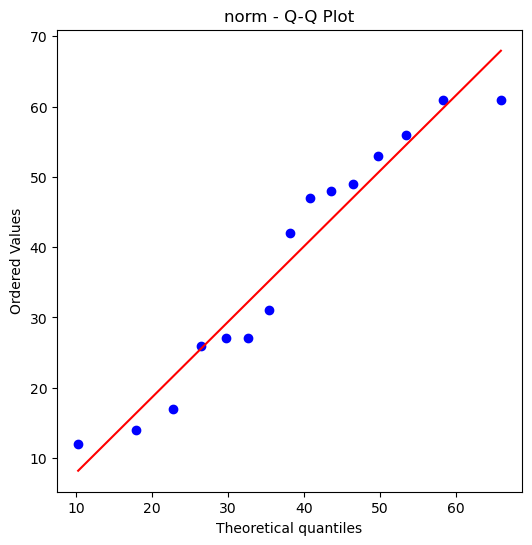


Fitting expon Distribution:
Estimated Parameters: [12.0, 26.067]
KS Statistic: 0.217, KS P-value: 0.42


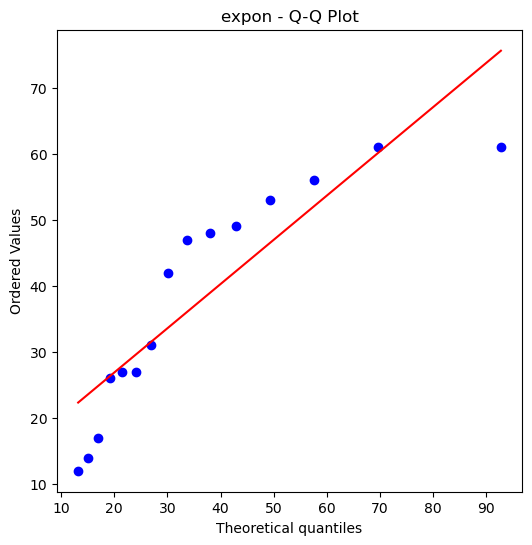


Fitting gamma Distribution:
Estimated Parameters: [484.704, -325.612, 0.75]
KS Statistic: 0.177, KS P-value: 0.67


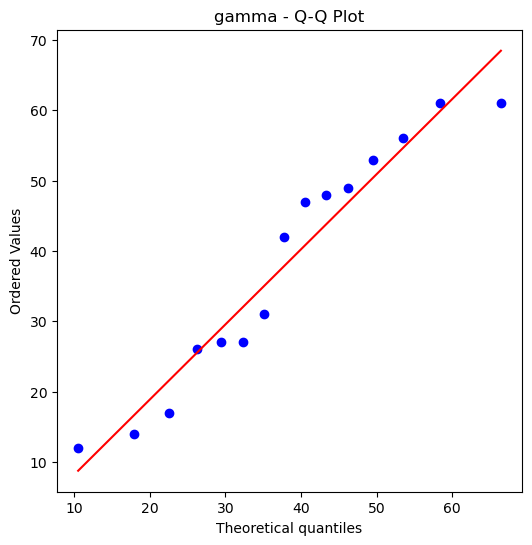


Fitting lognorm Distribution:
Estimated Parameters: [0.0, -8388596.0, 8388634.067]
KS Statistic: 0.173, KS P-value: 0.696


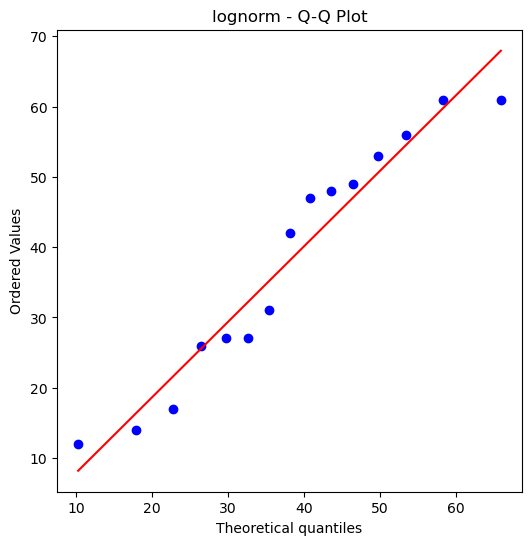


Fitting beta Distribution:
Estimated Parameters: [0.726, 0.603, 11.097, 49.903]
KS Statistic: 0.133, KS P-value: 0.921


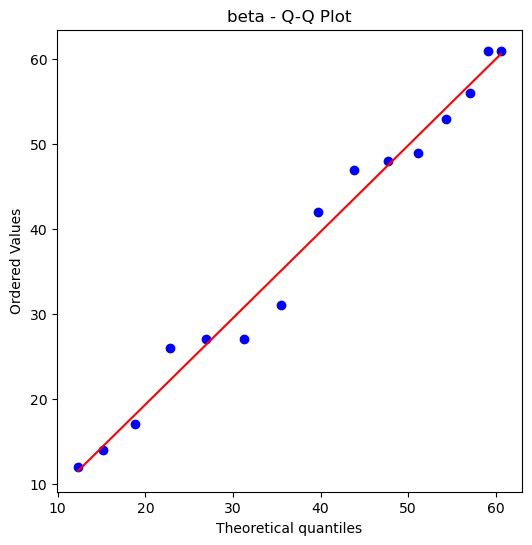


Fitting uniform Distribution:
Estimated Parameters: [12.0, 49.0]
KS Statistic: 0.181, KS P-value: 0.646


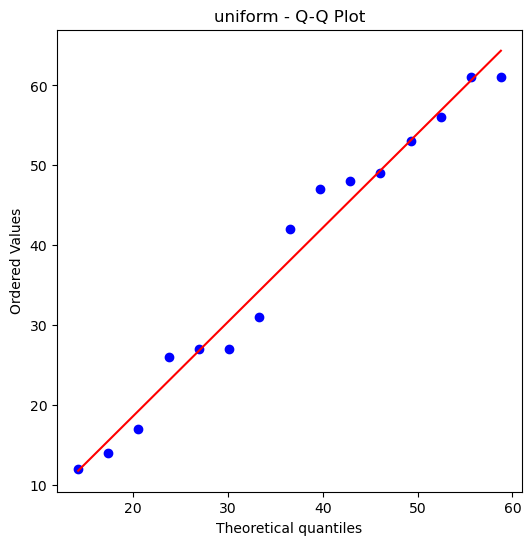


Distribution Fit Comparison:
Distribution  KS Statistic  KS P-value                     Parameters
        norm         0.173       0.696               [38.067, 16.438]
       expon         0.217       0.420                 [12.0, 26.067]
       gamma         0.177       0.670      [484.704, -325.612, 0.75]
     lognorm         0.173       0.696 [0.0, -8388596.0, 8388634.067]
        beta         0.133       0.921 [0.726, 0.603, 11.097, 49.903]
     uniform         0.181       0.646                   [12.0, 49.0]



In [60]:
# Frozen on-peak data
frozen_on_peak = [27, 17, 56, 48, 26, 31, 42, 12, 49, 47, 61, 61, 14, 27, 53]

# List of distributions to fit
distributions = ['norm', 'expon', 'gamma', 'lognorm', 'beta', 'uniform']

# Fit and test distributions for frozen items (on-peak)
print("Frozen Items (On-Peak):")
df_frozen = fit_multiple_distributions(frozen_on_peak, distributions)
print()

Snack Items (On-Peak):

Fitting norm Distribution:
Estimated Parameters: [31.933, 4.297]
KS Statistic: 0.095, KS P-value: 0.997


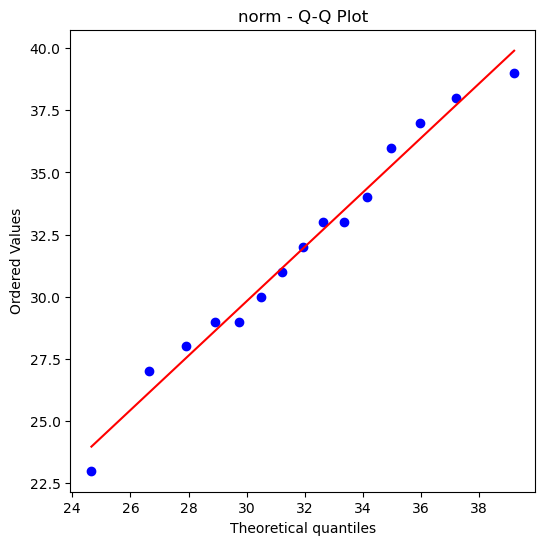


Fitting expon Distribution:
Estimated Parameters: [23.0, 8.933]
KS Statistic: 0.295, KS P-value: 0.118


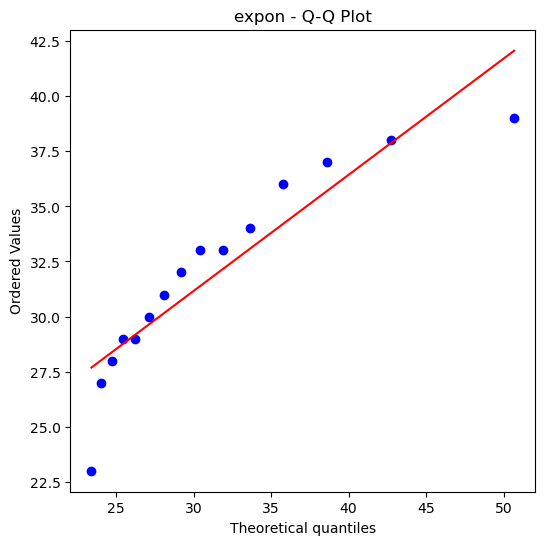


Fitting gamma Distribution:
Estimated Parameters: [499.564, -64.732, 0.194]
KS Statistic: 0.094, KS P-value: 0.998


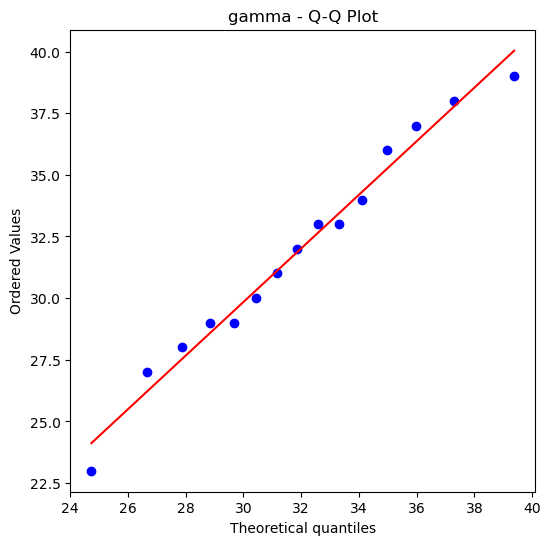


Fitting lognorm Distribution:
Estimated Parameters: [0.0, -213104.997, 213136.93]
KS Statistic: 0.095, KS P-value: 0.997


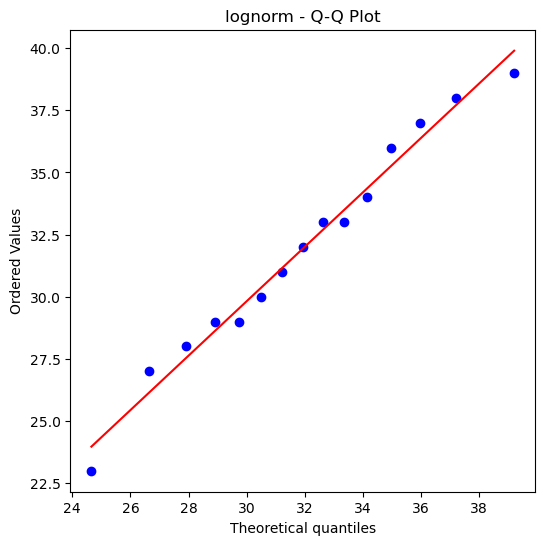


Fitting beta Distribution:
Estimated Parameters: [1.615, 0.863, 20.292, 18.708]
KS Statistic: 0.189, KS P-value: 0.596


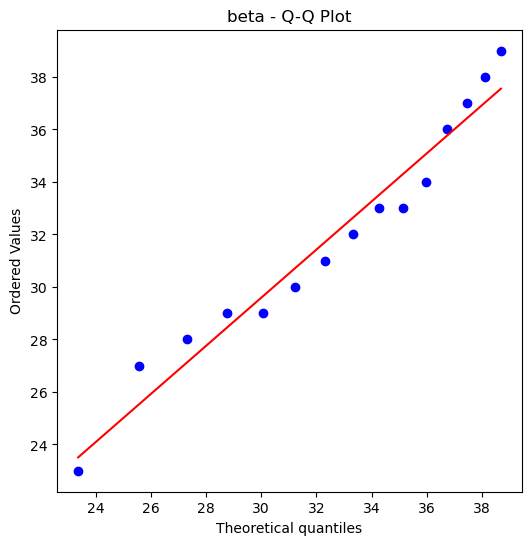


Fitting uniform Distribution:
Estimated Parameters: [23.0, 16.0]
KS Statistic: 0.183, KS P-value: 0.63


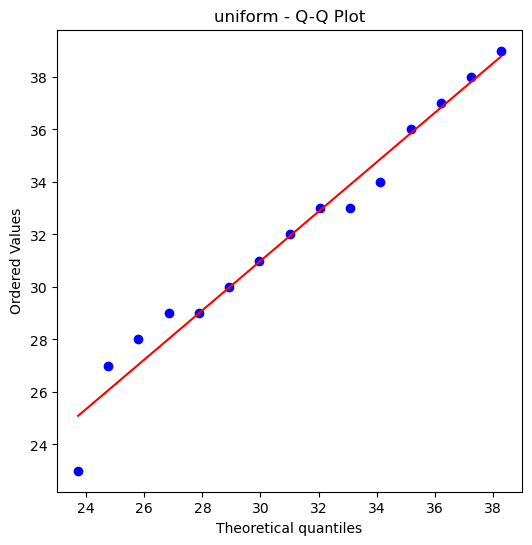


Distribution Fit Comparison:
Distribution  KS Statistic  KS P-value                     Parameters
        norm         0.095       0.997                [31.933, 4.297]
       expon         0.295       0.118                  [23.0, 8.933]
       gamma         0.094       0.998      [499.564, -64.732, 0.194]
     lognorm         0.095       0.997  [0.0, -213104.997, 213136.93]
        beta         0.189       0.596 [1.615, 0.863, 20.292, 18.708]
     uniform         0.183       0.630                   [23.0, 16.0]



In [61]:
# Snack on-peak data
snack_on_peak = [34, 29, 27, 32, 39, 38, 31, 28, 37, 23, 33, 30, 33, 36, 29]

# List of distributions to fit
distributions = ['norm', 'expon', 'gamma', 'lognorm', 'beta', 'uniform']

# Fit and test distributions for snack items (on-peak)
print("Snack Items (On-Peak):")
df_snack = fit_multiple_distributions(snack_on_peak, distributions)
print()

Bakery Items (On-Peak):

Fitting norm Distribution:
Estimated Parameters: [7.267, 1.879]
KS Statistic: 0.217, KS P-value: 0.423


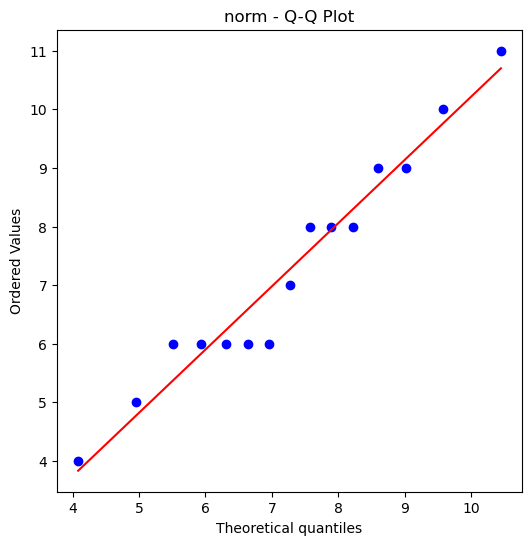


Fitting expon Distribution:
Estimated Parameters: [4.0, 3.267]
KS Statistic: 0.325, KS P-value: 0.066


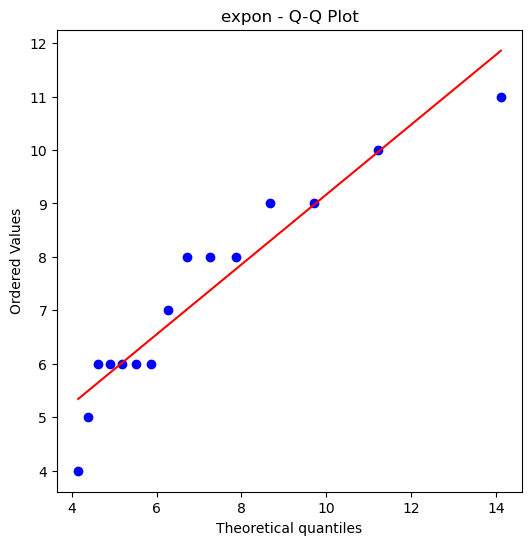


Fitting gamma Distribution:
Estimated Parameters: [11.965, 0.678, 0.551]
KS Statistic: 0.197, KS P-value: 0.539


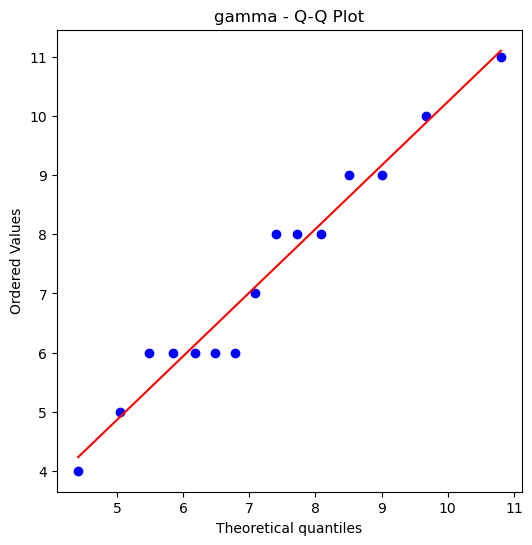


Fitting lognorm Distribution:
Estimated Parameters: [0.172, -3.682, 10.789]
KS Statistic: 0.202, KS P-value: 0.509


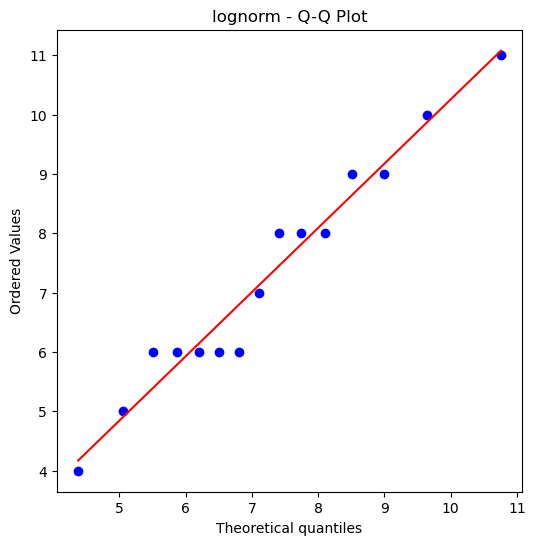


Fitting beta Distribution:
Estimated Parameters: [0.671, 0.883, 4.0, 7.004]
KS Statistic: 0.265, KS P-value: 0.204


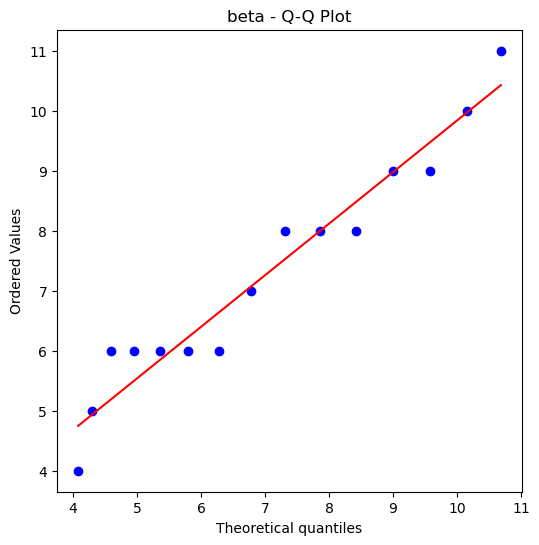


Fitting uniform Distribution:
Estimated Parameters: [4.0, 7.0]
KS Statistic: 0.181, KS P-value: 0.646


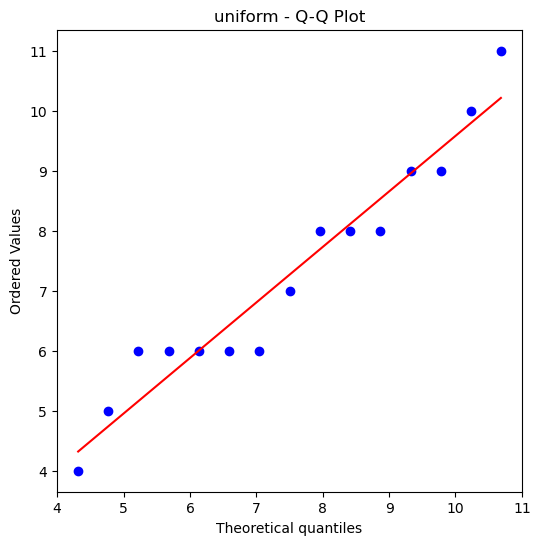


Distribution Fit Comparison:
Distribution  KS Statistic  KS P-value                 Parameters
        norm         0.217       0.423             [7.267, 1.879]
       expon         0.325       0.066               [4.0, 3.267]
       gamma         0.197       0.539     [11.965, 0.678, 0.551]
     lognorm         0.202       0.509    [0.172, -3.682, 10.789]
        beta         0.265       0.204 [0.671, 0.883, 4.0, 7.004]
     uniform         0.181       0.646                 [4.0, 7.0]



In [62]:
# Bakery on-peak data
bakery_on_peak = [10, 6, 6, 5, 7, 6, 11, 8, 6, 8, 6, 9, 9, 4, 8]

# List of distributions to fit
distributions = ['norm', 'expon', 'gamma', 'lognorm', 'beta', 'uniform']

# Fit and test distributions for bakery items (on peak)
print("Bakery Items (On-Peak):")
df_bakery = fit_multiple_distributions(bakery_on_peak, distributions)
print()

Frozen Items (Off-Peak):

Fitting norm Distribution:
Estimated Parameters: [14.733, 1.436]
KS Statistic: 0.174, KS P-value: 0.694


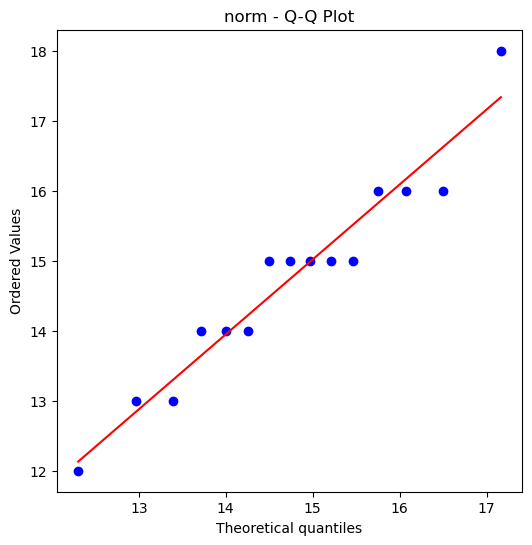


Fitting expon Distribution:
Estimated Parameters: [12.0, 2.733]
KS Statistic: 0.319, KS P-value: 0.074


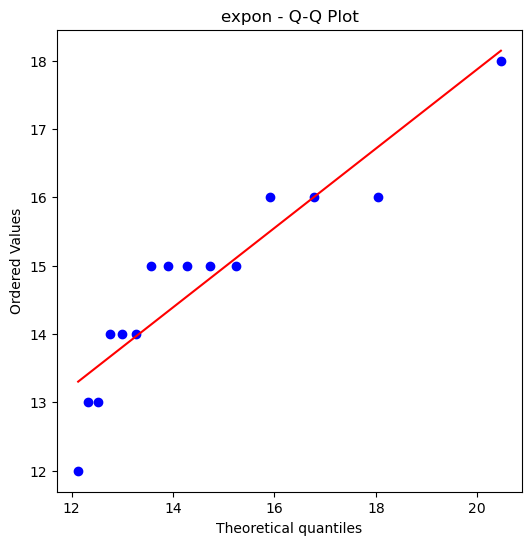


Fitting gamma Distribution:
Estimated Parameters: [90.848, 1.043, 0.151]
KS Statistic: 0.187, KS P-value: 0.607


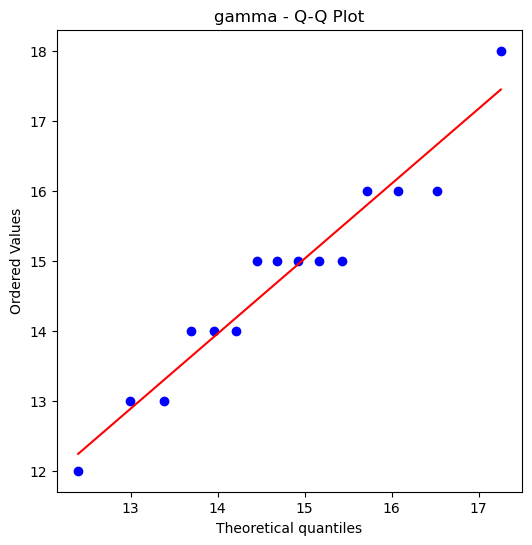


Fitting lognorm Distribution:
Estimated Parameters: [0.069, -6.111, 20.795]
KS Statistic: 0.187, KS P-value: 0.607


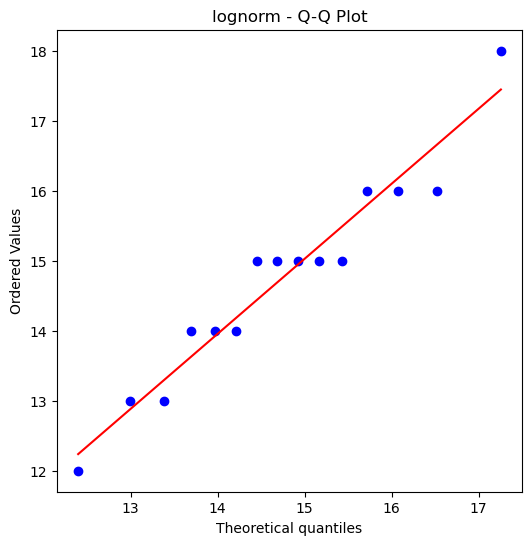

C:\Users\rebec\anaconda3\Lib\site-packages\scipy\stats\_continuous_distns.py:790: RuntimeWarning: The iteration is not making good progress, as measured by the 
  improvement from the last ten iterations.
  a, b = optimize.fsolve(func, (1.0, 1.0))



Fitting beta Distribution:
Estimated Parameters: [89.979, 33855291.382, 1.11, 5126004.413]
KS Statistic: 0.187, KS P-value: 0.606


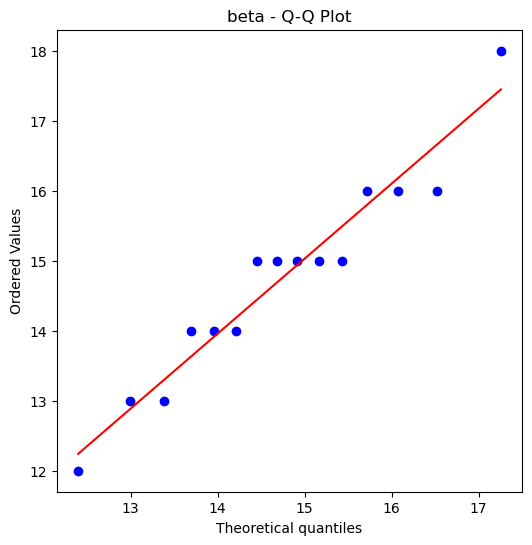


Fitting uniform Distribution:
Estimated Parameters: [12.0, 6.0]
KS Statistic: 0.267, KS P-value: 0.197


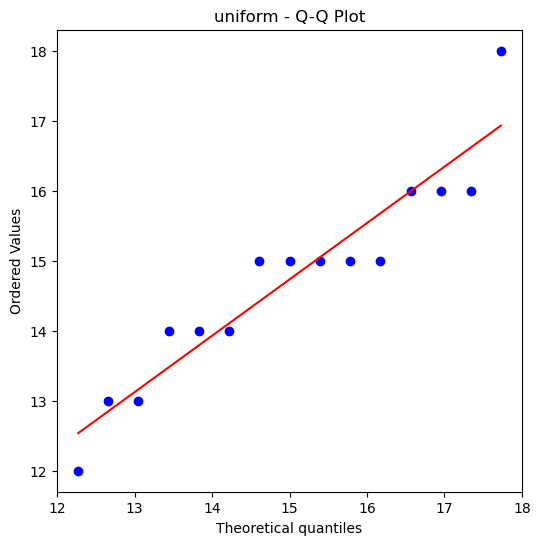


Distribution Fit Comparison:
Distribution  KS Statistic  KS P-value                                Parameters
        norm         0.174       0.694                           [14.733, 1.436]
       expon         0.319       0.074                             [12.0, 2.733]
       gamma         0.187       0.607                    [90.848, 1.043, 0.151]
     lognorm         0.187       0.607                   [0.069, -6.111, 20.795]
        beta         0.187       0.606 [89.979, 33855291.382, 1.11, 5126004.413]
     uniform         0.267       0.197                               [12.0, 6.0]



In [63]:
# Frozen off-peak data
frozen_off_peak = [18, 15, 14, 16, 15, 13, 12, 16, 14, 14, 16, 15, 15, 15, 13]

# List of distributions to fit
distributions = ['norm', 'expon', 'gamma', 'lognorm', 'beta', 'uniform']

# Fit and test distributions for frozen items (off-peak)
print("Frozen Items (Off-Peak):")
df_frozen = fit_multiple_distributions(frozen_off_peak, distributions)
print()

Snack Items (Off-Peak):

Fitting norm Distribution:
Estimated Parameters: [22.667, 11.276]
KS Statistic: 0.129, KS P-value: 0.935


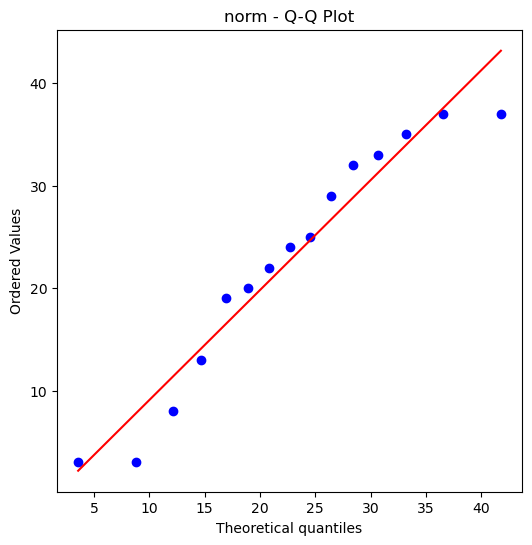


Fitting expon Distribution:
Estimated Parameters: [3.0, 19.667]
KS Statistic: 0.29, KS P-value: 0.13


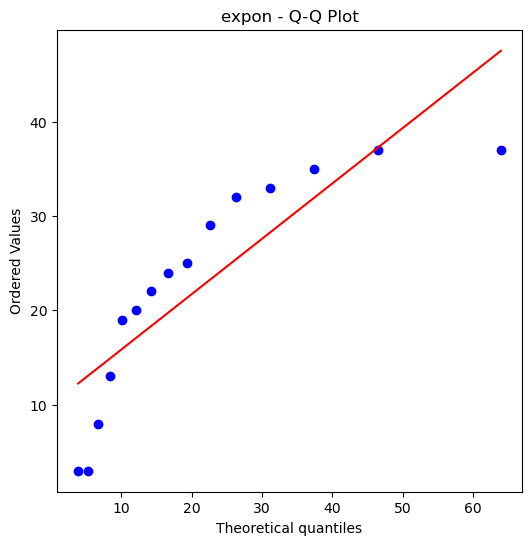


Fitting gamma Distribution:
Estimated Parameters: [197.161, -139.91, 0.824]
KS Statistic: 0.126, KS P-value: 0.946


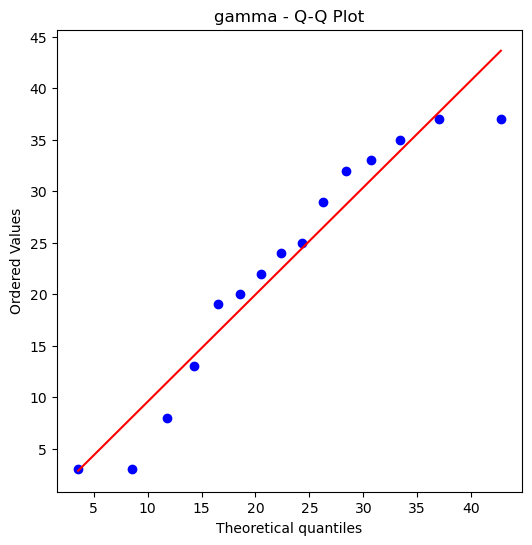


Fitting lognorm Distribution:
Estimated Parameters: [13.05, 3.0, 0.122]
KS Statistic: 0.479, KS P-value: 0.001


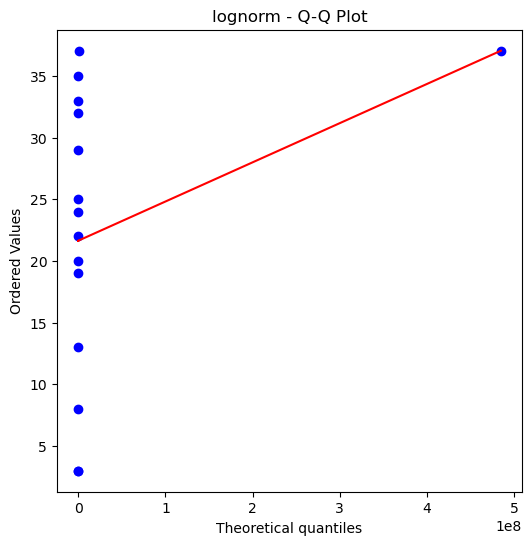


Fitting beta Distribution:
Estimated Parameters: [1.177, 0.702, -1.742, 38.742]
KS Statistic: 0.133, KS P-value: 0.921


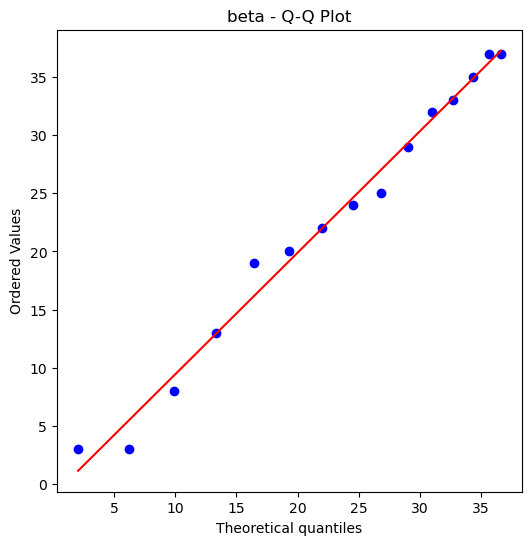


Fitting uniform Distribution:
Estimated Parameters: [3.0, 34.0]
KS Statistic: 0.204, KS P-value: 0.498


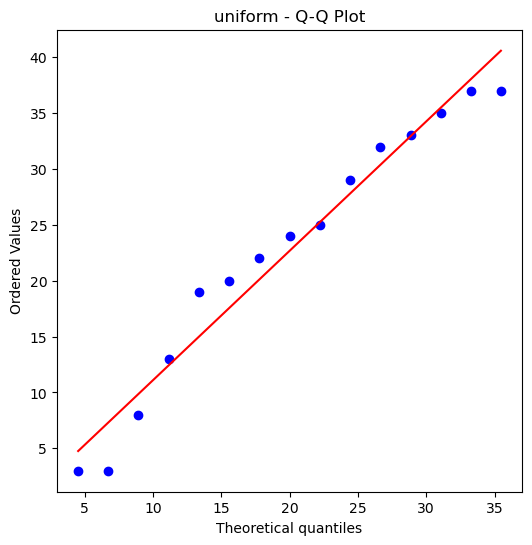


Distribution Fit Comparison:
Distribution  KS Statistic  KS P-value                     Parameters
        norm         0.129       0.935               [22.667, 11.276]
       expon         0.290       0.130                  [3.0, 19.667]
       gamma         0.126       0.946      [197.161, -139.91, 0.824]
     lognorm         0.479       0.001            [13.05, 3.0, 0.122]
        beta         0.133       0.921 [1.177, 0.702, -1.742, 38.742]
     uniform         0.204       0.498                    [3.0, 34.0]



In [64]:
# Snack off-peak data
snack_off_peak = [20, 32, 8, 25, 33, 3, 3, 24, 35, 37, 29, 13, 22, 37, 19]

# List of distributions to fit
distributions = ['norm', 'expon', 'gamma', 'lognorm', 'beta', 'uniform']

# Fit and test distributions for snack items (off-peak)
print("Snack Items (Off-Peak):")
df_snack = fit_multiple_distributions(snack_off_peak, distributions)
print()

Bakery Items (Off-Peak):

Fitting norm Distribution:
Estimated Parameters: [2.667, 1.989]
KS Statistic: 0.165, KS P-value: 0.753


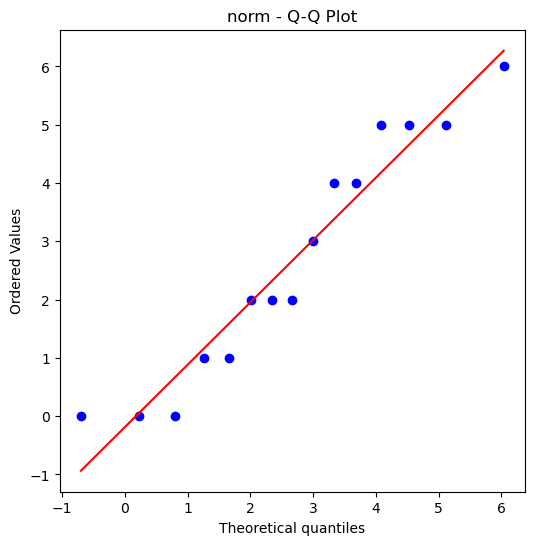


Fitting expon Distribution:
Estimated Parameters: [0.0, 2.667]
KS Statistic: 0.2, KS P-value: 0.522


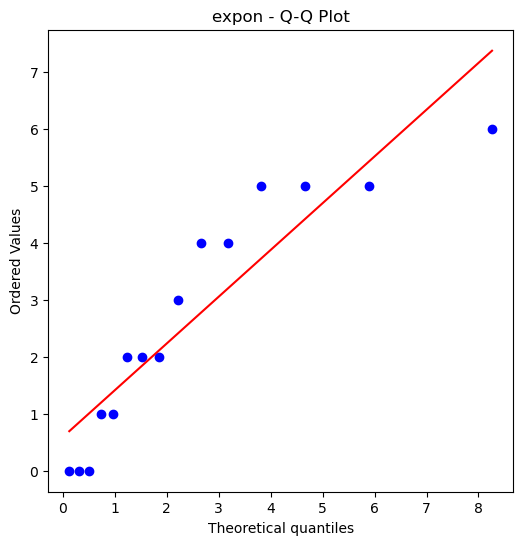


Fitting gamma Distribution:
Estimated Parameters: [143.36, -21.054, 0.165]
KS Statistic: 0.156, KS P-value: 0.808


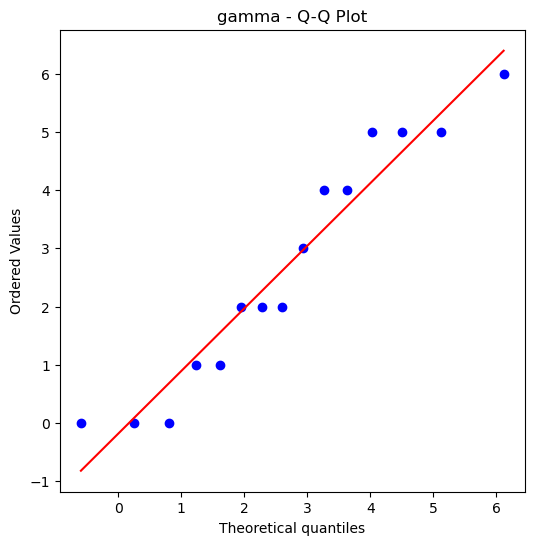

C:\Users\rebec\anaconda3\Lib\site-packages\scipy\stats\_continuous_distns.py:6626: RuntimeWarning: overflow encountered in divide
  return np.sum((1 + np.log(shifted/scale)/shape**2)/shifted)
C:\Users\rebec\anaconda3\Lib\site-packages\numpy\core\fromnumeric.py:88: RuntimeWarning: overflow encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)
C:\Users\rebec\anaconda3\Lib\site-packages\scipy\stats\_stats_py.py:10943: RuntimeWarning: invalid value encountered in scalar multiply
  intercept_stderr = slope_stderr * np.sqrt(ssxm + xmean**2)



Fitting lognorm Distribution:
Estimated Parameters: [298.196, -0.0, 0.0]
KS Statistic: 0.49, KS P-value: 0.001


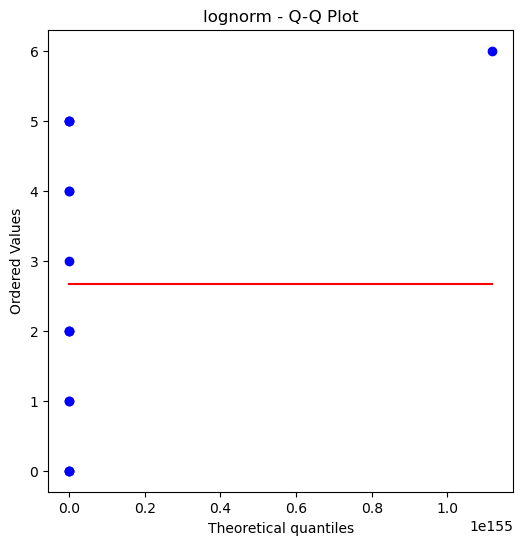


Fitting beta Distribution:
Estimated Parameters: [0.667, 0.822, -0.582, 6.582]
KS Statistic: 0.172, KS P-value: 0.707


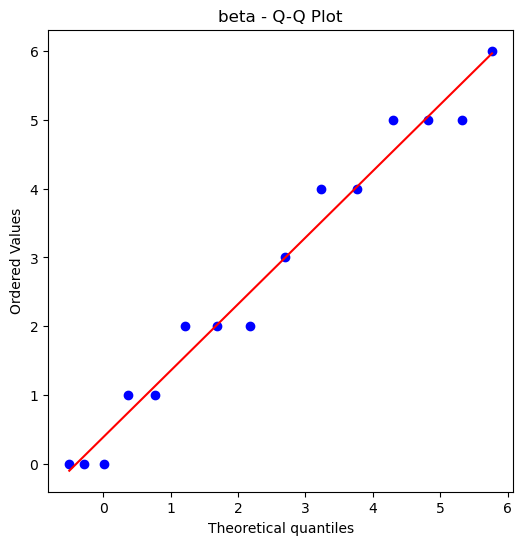


Fitting uniform Distribution:
Estimated Parameters: [0.0, 6.0]
KS Statistic: 0.2, KS P-value: 0.522


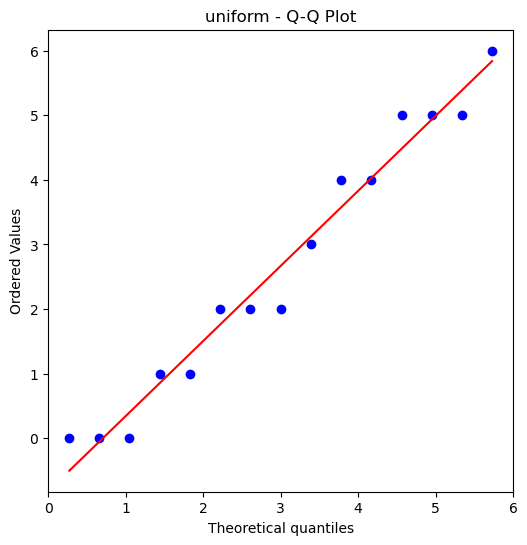


Distribution Fit Comparison:
Distribution  KS Statistic  KS P-value                    Parameters
        norm         0.165       0.753                [2.667, 1.989]
       expon         0.200       0.522                  [0.0, 2.667]
       gamma         0.156       0.808      [143.36, -21.054, 0.165]
     lognorm         0.490       0.001          [298.196, -0.0, 0.0]
        beta         0.172       0.707 [0.667, 0.822, -0.582, 6.582]
     uniform         0.200       0.522                    [0.0, 6.0]



In [65]:
# Bakery off-peak data
bakery_off_peak = [5, 3, 1, 0, 2, 2, 6, 2, 4, 0, 5, 0, 5, 4, 1]

# List of distributions to fit
distributions = ['norm', 'expon', 'gamma', 'lognorm', 'beta', 'uniform']

# Fit and test distributions for bakery items (off-peak)
print("Bakery Items (Off-Peak):")
df_bakery = fit_multiple_distributions(bakery_off_peak, distributions)
print()

# Final distributions for customer arrivals & each product category #
(Note: for off-peak snacks & bakery, gamma seemed like the better distirbution but had a negative scale parameter, which isn't realistic for our simulation)

On-Peak: 
- Customers Entering: poisson distribution with lambda = 42.8
- Frozen Items: beta distribution with parameters [0.726, 0.603, 11.097, 49.903]
- Snack Items: normal distribution with parameters [31.933, 4.297]
- Bakery Items: uniform distribution with parameters [4.0, 7.0]

Off-Peak: 
- Customers Entering: Poisson distribution with lambda = 20.733
- Frozen Items: normal distribution with parameters [14.733, 1.436]
- Snacks Items: normal distribution with parameters [22.667, 11.276]
- Bakery Items: normal distribution with parameters [2.667, 1.989]